In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Ford Car Price Prediction.csv')
df.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0


In [ ]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [ ]:
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

In [ ]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Total rows after removing duplicates: {len(df)}")

Total rows after removing duplicates: 17812


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df.columns)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'],
      dtype='object')


In [ ]:
df['transmission'] = df[['transmission_Manual', 'transmission_Semi-Auto']].idxmax(axis=1)
df['transmission'] = df['transmission'].str.replace('transmission_', '')

label_encoder = LabelEncoder()
df['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])

print(df[['transmission', 'transmission_encoded']].head())

  transmission  transmission_encoded
0       Manual                     0
1       Manual                     0
2       Manual                     0
3       Manual                     0
4       Manual                     0


In [ ]:
df['transmission'] = df[['transmission_Manual', 'transmission_Semi-Auto']].idxmax(axis=1)
df['transmission'] = df['transmission'].str.replace('transmission_', '')

print(df[['transmission']].head())

  transmission
0       Manual
1       Manual
2       Manual
3       Manual
4       Manual


In [ ]:
label_encoder = LabelEncoder()
df['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])

print(df[['transmission', 'transmission_encoded']].head())

  transmission  transmission_encoded
0       Manual                     0
1       Manual                     0
2       Manual                     0
3       Manual                     0
4       Manual                     0


In [ ]:
df.drop(['transmission_Manual', 'transmission_Semi-Auto'], axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()
numerical_cols = ['price', 'mileage', 'tax', 'mpg', 'engineSize']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols].head())

      price   mileage       tax       mpg  engineSize
0 -0.056915 -0.382994  0.000235 -0.020597   -0.810561
1  0.365369 -0.736317  0.000235 -0.020597   -0.810561
2  0.154227 -0.562616  0.000235 -0.020597   -0.810561
3  1.104366 -0.665405  0.000235 -1.737858    0.345325
4  0.893224 -1.127749  0.000235 -0.908836   -0.810561


In [ ]:
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df[numerical_cols].head())

       year   mileage       tax       mpg  engineSize
0  0.328125  0.089747  0.195367  0.203867         0.2
1  0.343750  0.051125  0.195367  0.203867         0.2
2  0.328125  0.070113  0.195367  0.203867         0.2
3  0.359375  0.058877  0.195367  0.107735         0.3
4  0.359375  0.008337  0.195367  0.154144         0.2


In [ ]:
print(df.dtypes)

year                            float64
price                           float64
mileage                         float64
tax                             float64
mpg                             float64
engineSize                      float64
model_ C-MAX                       bool
model_ EcoSport                    bool
model_ Edge                        bool
model_ Escort                      bool
model_ Fiesta                      bool
model_ Focus                       bool
model_ Fusion                      bool
model_ Galaxy                      bool
model_ Grand C-MAX                 bool
model_ Grand Tourneo Connect       bool
model_ KA                          bool
model_ Ka+                         bool
model_ Kuga                        bool
model_ Mondeo                      bool
model_ Mustang                     bool
model_ Puma                        bool
model_ Ranger                      bool
model_ S-MAX                       bool
model_ Streetka                    bool


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                          year     price   mileage       tax       mpg  \
year                  1.000000  0.635715 -0.708690  0.297086 -0.021702   
price                 0.635715  1.000000 -0.530483  0.405814 -0.346263   
mileage              -0.708690 -0.530483  1.000000 -0.257402  0.117697   
tax                   0.297086  0.405814 -0.257402  1.000000 -0.502198   
mpg                  -0.021702 -0.346263  0.117697 -0.502198  1.000000   
engineSize           -0.137582  0.411451  0.214692  0.185439 -0.262239   
transmission_encoded  0.013433  0.140648 -0.029242  0.089790 -0.174245   

                      engineSize  transmission_encoded  
year                   -0.137582              0.013433  
price                   0.411451              0.140648  
mileage                 0.214692             -0.029242  
tax                     0.185439              0.089790  
mpg                    -0.262239             -0.174245  
engineSize              1.000000              0.142181  
transmis

In [ ]:
df = df.select_dtypes(include=['number'])

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

                          year     price   mileage       tax       mpg  \
year                  1.000000  0.635715 -0.708690  0.297086 -0.021702   
price                 0.635715  1.000000 -0.530483  0.405814 -0.346263   
mileage              -0.708690 -0.530483  1.000000 -0.257402  0.117697   
tax                   0.297086  0.405814 -0.257402  1.000000 -0.502198   
mpg                  -0.021702 -0.346263  0.117697 -0.502198  1.000000   
engineSize           -0.137582  0.411451  0.214692  0.185439 -0.262239   
transmission_encoded  0.013433  0.140648 -0.029242  0.089790 -0.174245   

                      engineSize  transmission_encoded  
year                   -0.137582              0.013433  
price                   0.411451              0.140648  
mileage                 0.214692             -0.029242  
tax                     0.185439              0.089790  
mpg                    -0.262239             -0.174245  
engineSize              1.000000              0.142181  
transmis

In [ ]:
df = df.select_dtypes(include=['number'])


In [ ]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

df.drop(columns=constant_cols, inplace=True)

Constant columns: []


In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [ ]:
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df = df.drop(columns=non_numeric_cols)

In [ ]:
print(df.isnull().sum())

year                    0
price                   0
mileage                 0
tax                     0
mpg                     0
engineSize              0
transmission_encoded    0
dtype: int64


In [ ]:
print(df.dtypes)

year                    float64
price                   float64
mileage                 float64
tax                     float64
mpg                     float64
engineSize              float64
transmission_encoded      int64
dtype: object


                          year     price   mileage       tax       mpg  \
year                  1.000000  0.635715 -0.708690  0.297086 -0.021702   
price                 0.635715  1.000000 -0.530483  0.405814 -0.346263   
mileage              -0.708690 -0.530483  1.000000 -0.257402  0.117697   
tax                   0.297086  0.405814 -0.257402  1.000000 -0.502198   
mpg                  -0.021702 -0.346263  0.117697 -0.502198  1.000000   
engineSize           -0.137582  0.411451  0.214692  0.185439 -0.262239   
transmission_encoded  0.013433  0.140648 -0.029242  0.089790 -0.174245   

                      engineSize  transmission_encoded  
year                   -0.137582              0.013433  
price                   0.411451              0.140648  
mileage                 0.214692             -0.029242  
tax                     0.185439              0.089790  
mpg                    -0.262239             -0.174245  
engineSize              1.000000              0.142181  
transmis

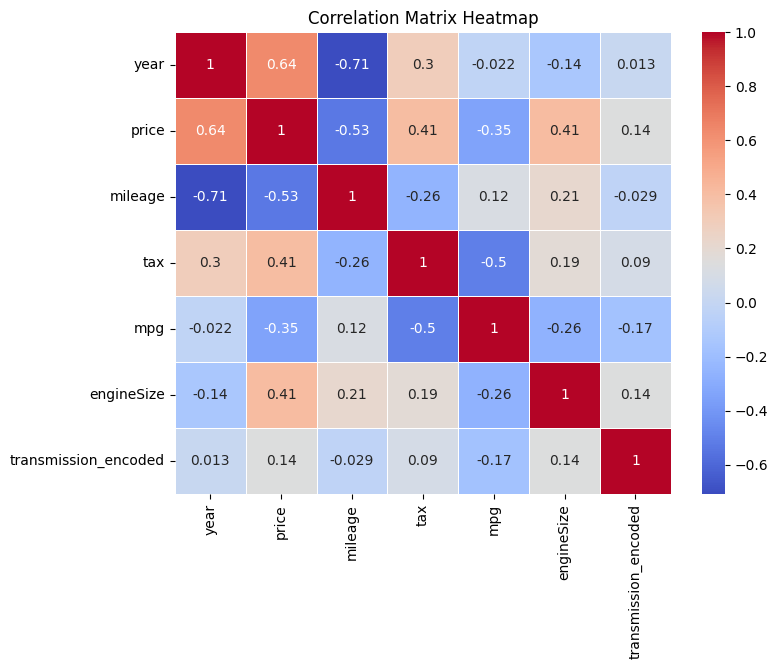

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
threshold = 0.8

high_correlation_pairs = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)].stack().reset_index()

high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['level_0'] != high_correlation_pairs['level_1']]

print(high_correlation_pairs)


Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [ ]:
df.drop(['transmission_encoded'], axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.head())


       year     price   mileage       tax       mpg  engineSize
0  0.067059 -0.056915 -0.382994  0.000235 -0.020597   -0.810561
1  0.554393  0.365369 -0.736317  0.000235 -0.020597   -0.810561
2  0.067059  0.154227 -0.562616  0.000235 -0.020597   -0.810561
3  1.041726  1.104366 -0.665405  0.000235 -1.737858    0.345325
4  1.041726  0.893224 -1.127749  0.000235 -0.908836   -0.810561


In [ ]:
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Training set mean:\n", X_train_scaled.mean())
print("Training set standard deviation:\n", X_train_scaled.std())

Training set mean:
 year         -4.986615e-18
mileage      -4.487953e-18
tax          -6.632198e-17
mpg          -1.495984e-18
engineSize   -4.487953e-17
dtype: float64
Training set standard deviation:
 year          1.000035
mileage       1.000035
tax           1.000035
mpg           1.000035
engineSize    1.000035
dtype: float64


Lab 05 :

Linear Regression

In [ ]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_pred_train = linear_model.predict(X_train_scaled)
y_pred_test = linear_model.predict(X_test_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")

Training RMSE: 0.52
Testing RMSE: 0.56


Logistic Regression

In [ ]:
thresholds = [y_train.quantile(0.33), y_train.quantile(0.67)]

y_train_cat = pd.cut(y_train, bins=[-np.inf, thresholds[0], thresholds[1], np.inf], labels=[0, 1, 2])
y_test_cat = pd.cut(y_test, bins=[-np.inf, thresholds[0], thresholds[1], np.inf], labels=[0, 1, 2])

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train_cat)

y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test_cat, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.75
